In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_21140\4293658283.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Cargar el archivo NPY
intervals = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_1601.npy')
intervals_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_ref_1601.npy')
labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_1601.npy')
labels_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_ref_1601.npy')
test_intervals_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_intervals_1601.npy')
test_labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_labels_1601.npy')
x_out_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_1601.npy')
x_out_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_ref_1601.npy')
x_out_1601_test = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_test_1601.npy')

In [3]:
# Suponiendo que intervals_ref es un array de NumPy o una estructura de datos compatible
print(np.unique(intervals_ref))

['000_020' '000_050' '000_080' '000_110' '000_140']


In [4]:
unique_tags = np.unique(labels_1601)

tag_positions_x_out = {}
for tag in unique_tags:
  tag_positions_x_out[tag] = np.where(labels_1601 == tag)[0]

print(tag_positions_x_out)

{'tag_00001_4x4': array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  1

In [5]:
unique_tags = np.unique(labels_1601_ref)

tag_positions = {}
for tag in unique_tags:
  tag_positions[tag] = np.where(labels_1601_ref == tag)[0]

print(tag_positions)

{'tag_00001_4x4': array([0, 1, 2, 3, 4], dtype=int64), 'tag_00010_2x2': array([5, 6, 7, 8, 9], dtype=int64), 'tag_00100_4x4': array([10, 11, 12, 13, 14], dtype=int64), 'tag_00111_2x2': array([15, 16, 17, 18, 19], dtype=int64), 'tag_01000_2x2': array([20, 21, 22, 23, 24], dtype=int64), 'tag_01011_4x4': array([25, 26, 27, 28, 29], dtype=int64), 'tag_01101_1x1': array([30, 31, 32, 33, 34], dtype=int64), 'tag_01110_3x3': array([35, 36, 37, 38, 39], dtype=int64), 'tag_10000_4x4': array([40, 41, 42, 43, 44], dtype=int64), 'tag_10011_2x2': array([45, 46, 47, 48, 49], dtype=int64), 'tag_10101_4x4': array([50, 51, 52, 53, 54], dtype=int64), 'tag_10110_1x1': array([55, 56, 57, 58, 59], dtype=int64), 'tag_11001_2x2': array([60, 61, 62, 63, 64], dtype=int64), 'tag_11010_3x3': array([65, 66, 67, 68, 69], dtype=int64), 'tag_11100_1x1': array([70, 71, 72, 73, 74], dtype=int64), 'tag_11111_1x1': array([75, 76, 77, 78, 79], dtype=int64)}


In [7]:
from scipy.spatial.distance import cosine

def cosine_distances(matrix1, matrix_list):
  distances = []
  for matrix2 in matrix_list:
    distance = cosine(matrix1.flatten(), matrix2.flatten())
    distances.append(distance)
  return distances

# Calcula las distancias coseno
distances = cosine_distances(x_out_1601[0], x_out_1601_ref[0:5])
print(distances)

[2.0, 2.0, 2.0, 2.0, 0.7010345435994292]


In [8]:
from scipy.spatial.distance import euclidean

def euclidean_distances(matrix1, matrix_list):
  distances = []
  for matrix2 in matrix_list:
    distance = euclidean(matrix1.flatten(), matrix2.flatten())
    distances.append(distance)
  return distances

# Calcula las distancias Euclidianas
distances = euclidean_distances(x_out_1601[0], x_out_1601_ref[0:5])
print(distances)

[43215.55895739404, 32237.821049196238, 42425.76429482444, 41397.45896791251, 43435.74483072668]


In [9]:
import numpy as np

def pearson_correlations(matrix1, matrix_list):
  correlations = []
  for matrix2 in matrix_list:
    correlation = np.corrcoef(matrix1.flatten(), matrix2.flatten())[0, 1]
    correlations.append(correlation)
  return correlations

# Calcula las correlaciones de Pearson
correlations = pearson_correlations(x_out_1601[0], x_out_1601_ref[0:5])
print(correlations)

[0.13512280389061923, 0.8885604372122354, 0.6203822459247209, 0.6263247440507234, 0.6238849422178746]


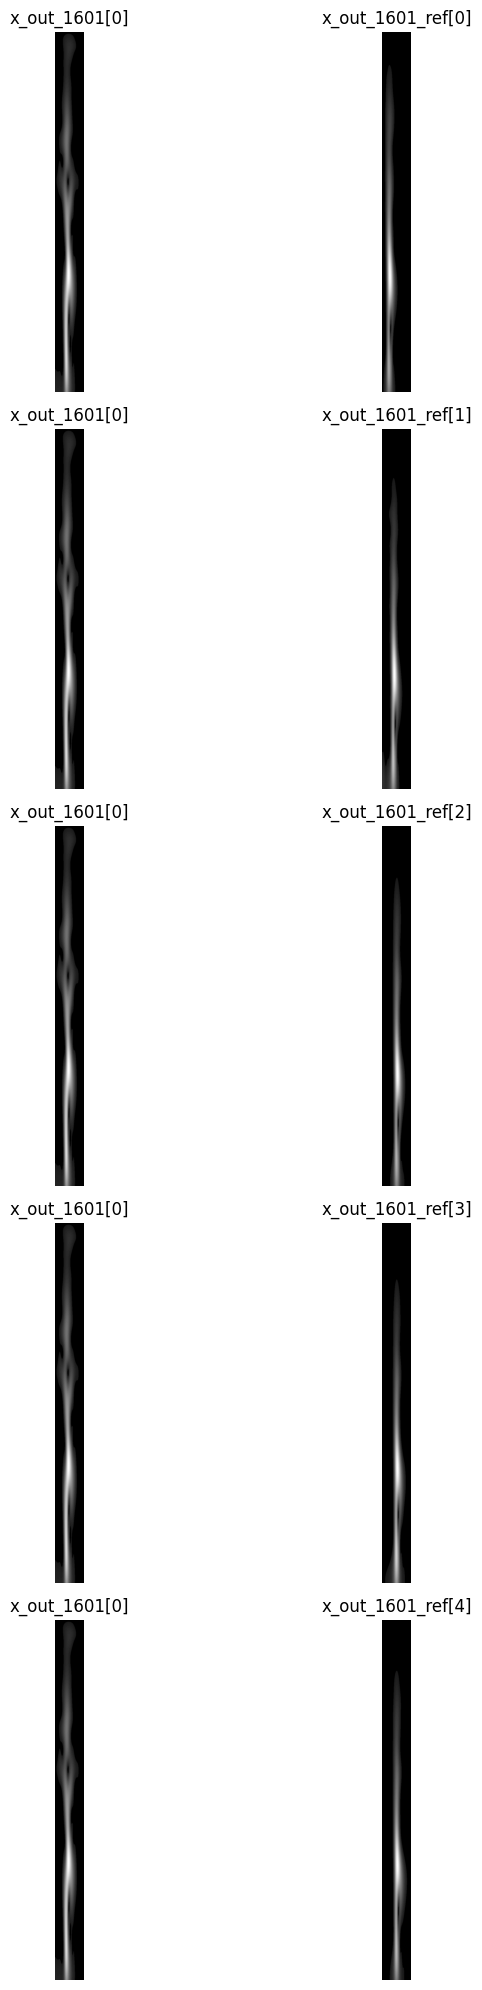

In [10]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# Mostrar x_out_1601[0] en la primera columna
for i in range(5):
    axes[i, 0].imshow(x_out_1601[0], cmap='gray')
    axes[i, 0].set_title('x_out_1601[0]')
    axes[i, 0].axis('off')

# Mostrar x_out_1601_ref[0:5] en la segunda columna
for i in range(5):
    axes[i, 1].imshow(x_out_1601_ref[i], cmap='gray')
    axes[i, 1].set_title(f'x_out_1601_ref[{i}]')
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

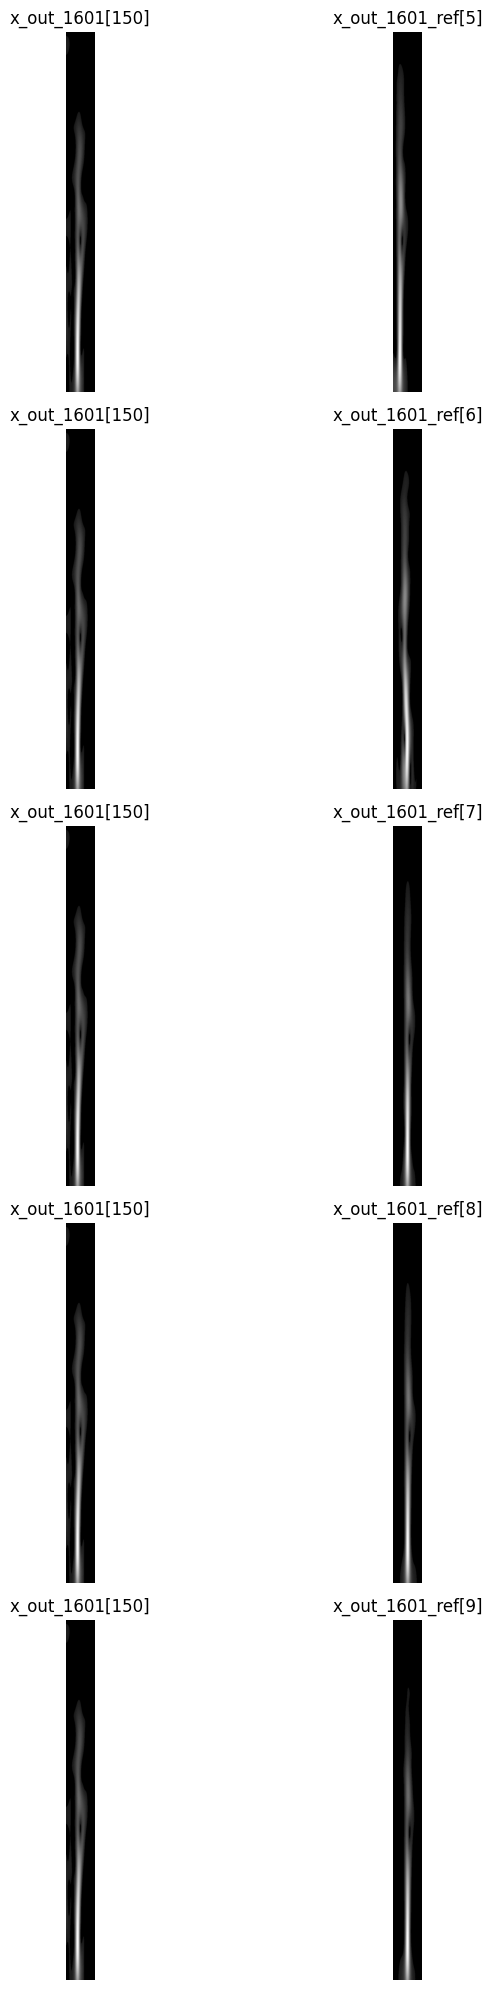

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# Mostrar x_out_1601[0] en la primera columna
for i in range(5):
    axes[i, 0].imshow(x_out_1601[150], cmap='gray')
    axes[i, 0].set_title('x_out_1601[150]')
    axes[i, 0].axis('off')

for i in range(5, 10):
    axes[i - 5, 1].imshow(x_out_1601_ref[i], cmap='gray')
    axes[i - 5, 1].set_title(f'x_out_1601_ref[{i}]')
    axes[i - 5, 1].axis('off')

plt.tight_layout()
plt.show()

In [12]:
print(intervals_ref[10:15])
print(intervals[300])

['000_020' '000_050' '000_080' '000_110' '000_140']
050_080


In [13]:
# Calcula las distancias coseno
distances = cosine_distances(x_out_1601[150], x_out_1601_ref[5:10])
print(distances)

[2.0, 2.0, 2.0, 2.0, 2.0]


In [14]:
# Calcula las distancias Euclidianas
distances = euclidean_distances (x_out_1601[150], x_out_1601_ref[5:10])
print(distances)

[44307.611761411834, 48087.69157487184, 37553.38968721732, 38024.85932912836, 33763.36809324568]


In [15]:
# Calcula las correlaciones de Pearson
correlations = pearson_correlations(x_out_1601[150], x_out_1601_ref[5:10])
print(correlations)

[0.023409312367776085, 0.7219616688342235, 0.5423956708841309, 0.4969178612459921, 0.5324812151293001]


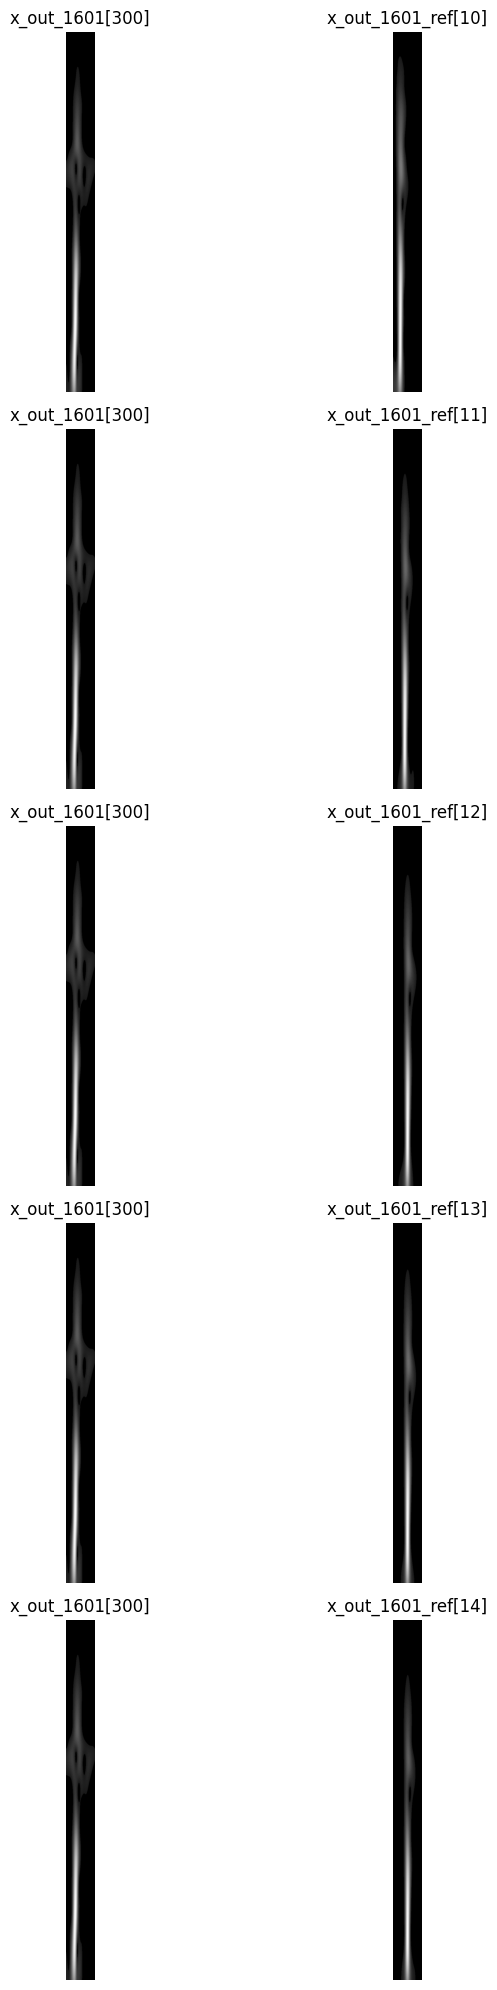

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# Mostrar x_out_1601[0] en la primera columna
for i in range(5):
    axes[i, 0].imshow(x_out_1601[300], cmap='gray')
    axes[i, 0].set_title('x_out_1601[300]')
    axes[i, 0].axis('off')

for i in range(10, 15):
    axes[i - 10, 1].imshow(x_out_1601_ref[i], cmap='gray')
    axes[i - 10, 1].set_title(f'x_out_1601_ref[{i}]')
    axes[i - 10, 1].axis('off')  # Turn off axes for second column

plt.tight_layout()
plt.show()

In [17]:
# Calcula las distancias coseno
distances = cosine_distances(x_out_1601[300], x_out_1601_ref[10:15])
print(distances)

[2.0, 1.901274082941463, 2.0, 2.0, 2.0]


In [18]:
# Calcula las distancias Euclidianas
distances = euclidean_distances (x_out_1601[300], x_out_1601_ref[10:15])
print(distances)

[43837.37537763866, 39753.04175783282, 44132.256978314625, 44771.2826150871, 43536.57794315029]


In [19]:
# Calcula las correlaciones de Pearson
correlations = pearson_correlations(x_out_1601[300], x_out_1601_ref[10:15])
print(correlations)

[0.660842115478867, 0.5202126125959986, 0.024904941672400167, 0.02146363311843959, 0.016857049454624722]


In [20]:
np.set_printoptions(threshold=np.inf)

positions_array = []
for label in labels_1601:
    positions = tag_positions.get(label)
    if positions is not None:
        positions_array.append(positions.tolist())  # Convert to list for 2D array

positions_array = np.array(positions_array)
positions_array

array([[ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1

['000_020' '000_050' '000_080' '000_110' '000_140']
110_140
[30 31 32 33 34]
[2.0, 2.0, 2.0, 2.0, 2.0]
[48410.23344294055, 51368.528195773724, 51920.72630462713, 51379.861405029114, 54456.29087626149]
[0.0810332311263442, -0.3458783062954161, -0.22156399113407657, -0.3216180244377883, -0.39812225916670985]


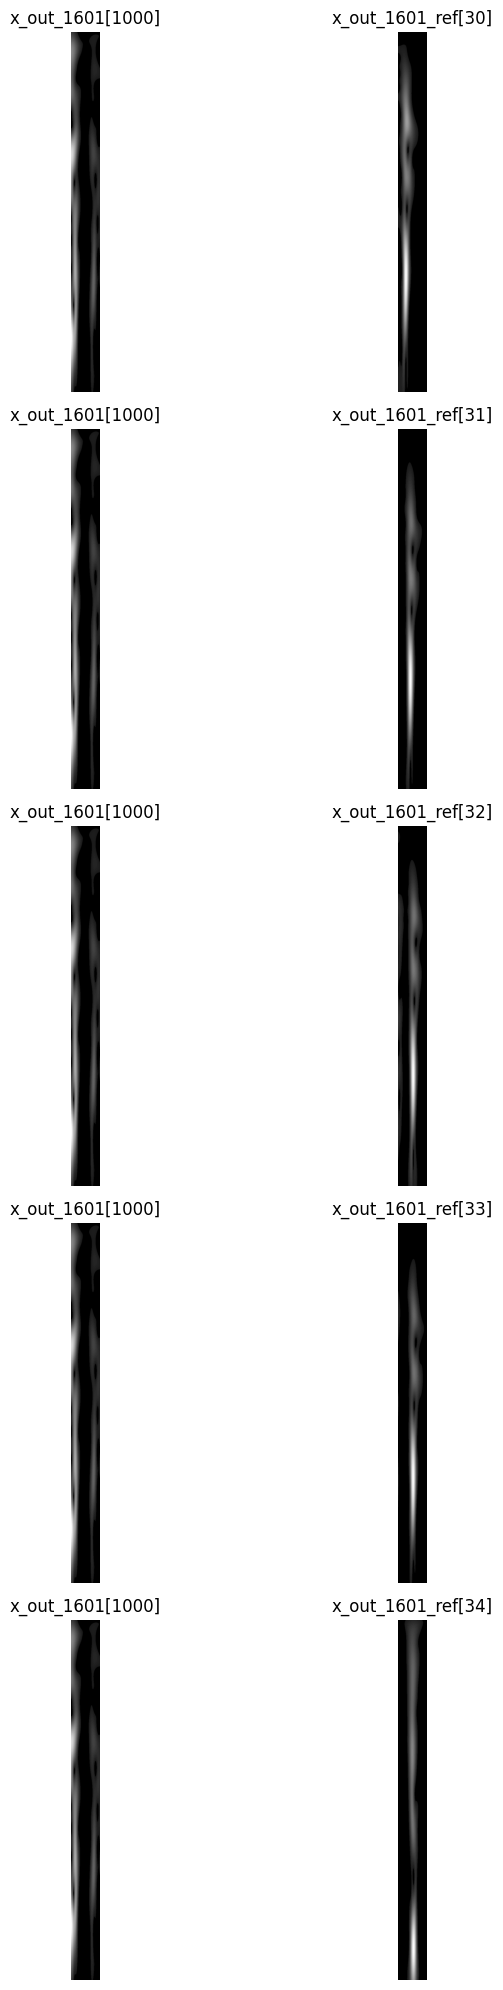

In [21]:
print(intervals_ref[10:15])
print(intervals[1000])
print(positions_array[1000])

# Calcula las distancias coseno
distances = cosine_distances(x_out_1601[1000], x_out_1601_ref[30:35])
print(distances)
# Calcula las distancias Euclidianas
distances = euclidean_distances (x_out_1601[1000], x_out_1601_ref[30:35])
print(distances)
# Calcula las correlaciones de Pearson
correlations = pearson_correlations(x_out_1601[1000], x_out_1601_ref[30:35])
print(correlations)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

# Mostrar x_out_1601[0] en la primera columna
for i in range(5):
    axes[i, 0].imshow(x_out_1601[1000], cmap='gray')
    axes[i, 0].set_title('x_out_1601[1000]')
    axes[i, 0].axis('off')

for i in range(30, 35):
    axes[i- 30, 1].imshow(x_out_1601_ref[i], cmap='gray')
    axes[i- 30, 1].set_title(f'x_out_1601_ref[{i}]')
    axes[i- 30, 1].axis('off')  # Turn off axes for second column

plt.tight_layout()
plt.show()

In [22]:
# Calcula las correlaciones de Pearson
correlations = pearson_correlations(x_out_1601[0], x_out_1601_ref[positions_array[0]])
print(correlations)

[0.13512280389061923, 0.8885604372122354, 0.6203822459247209, 0.6263247440507234, 0.6238849422178746]


In [23]:
positions_array[1000]

array([30, 31, 32, 33, 34])

In [24]:
# Calcula las correlaciones de Pearson
correlations = pearson_correlations(x_out_1601[1000], x_out_1601_ref[positions_array[1000]])
min_index = np.argmin(correlations)
print(correlations)
print(min_index)

[0.0810332311263442, -0.3458783062954161, -0.22156399113407657, -0.3216180244377883, -0.39812225916670985]
4


In [25]:
j=5

# Calcula las correlaciones de Pearson
distances = euclidean_distances(x_out_1601[j], x_out_1601_ref[positions_array[j]])
min_index = np.argmin(distances)
print(positions_array[j][min_index])

2


In [26]:
result_array = []
for i in range(len(x_out_1601)):
    # Calcula las correlaciones de Pearson
    correlations = pearson_correlations(x_out_1601[i], x_out_1601_ref[positions_array[i]])
    # Encuentra el índice con el valor máximo en valor absoluto
    max_index = np.argmax(np.abs(correlations))
    result_array.append([positions_array[i][max_index]])  # Append as a single-element list

result_array = np.array(result_array)


In [27]:
result_array_flat = result_array.flatten()
print(result_array_flat)

[ 1  1  1  4  4  4  4  4  4  4  4  4  4  1  1  1  1  4  4  4  4  4  4  4
  4  4  4  4  1  1  1  1  1  2  4  4  4  4  4  4  4  4  4  1  1  1  4  4
  4  4  4  4  3  3  2  4  4  4  4  3  3  4  4  4  4  4  3  3  4  2  4  4
  4  3  4  4  3  4  4  3  3  3  4  2  4  3  4  4  4  4  4  4  4  4  4  4
  4  4  3  3  4  4  3  3  4  4  4  4  4  4  3  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  3  4  4  4  4  4  3  4  4  4  4  4  4  4  4  3  3  4  4
  4  4  4  4  3  4  6  6  6  7  7  9  8  8  6  6  6  6  6  6  6  7  9  9
  8  7  7  6  6  6  6  6  9  7  8  7  7  6  6  6  6  6  6  6  6  9  9  9
  8  9  9  9  9  9  7  6  8  9  9  9  7  7  8  7  7  9  7  7  8  9  7  8
  8  8  7  8  8  8  7  9  9  9  8  8  7  8  8  8  7  7  7  7  7  8  8  9
  7  9  7  7  8  8  8  7  8  7  6  8  9  7  6  6  6  7  6  8  7  7  9  7
  6  7  6  6  6  6  7  8  7  8  9  8  7  6  6  7  6  6  6  6  6  7  7  7
  7  7  7  6  8  7  6  6  6  6  6  8 10 11 11 13 13 13 12 13 13 11 11 11
 11 11 13 13 13 13 13 13 11 11 11 11 13 13 12 13 12

**Ahora haremos lo mismo para el test**

In [28]:
unique_tags = np.unique(labels_1601_ref)

tag_positions = {}
for tag in unique_tags:
  tag_positions[tag] = np.where(labels_1601_ref == tag)[0]

print(tag_positions)

{'tag_00001_4x4': array([0, 1, 2, 3, 4], dtype=int64), 'tag_00010_2x2': array([5, 6, 7, 8, 9], dtype=int64), 'tag_00100_4x4': array([10, 11, 12, 13, 14], dtype=int64), 'tag_00111_2x2': array([15, 16, 17, 18, 19], dtype=int64), 'tag_01000_2x2': array([20, 21, 22, 23, 24], dtype=int64), 'tag_01011_4x4': array([25, 26, 27, 28, 29], dtype=int64), 'tag_01101_1x1': array([30, 31, 32, 33, 34], dtype=int64), 'tag_01110_3x3': array([35, 36, 37, 38, 39], dtype=int64), 'tag_10000_4x4': array([40, 41, 42, 43, 44], dtype=int64), 'tag_10011_2x2': array([45, 46, 47, 48, 49], dtype=int64), 'tag_10101_4x4': array([50, 51, 52, 53, 54], dtype=int64), 'tag_10110_1x1': array([55, 56, 57, 58, 59], dtype=int64), 'tag_11001_2x2': array([60, 61, 62, 63, 64], dtype=int64), 'tag_11010_3x3': array([65, 66, 67, 68, 69], dtype=int64), 'tag_11100_1x1': array([70, 71, 72, 73, 74], dtype=int64), 'tag_11111_1x1': array([75, 76, 77, 78, 79], dtype=int64)}


In [29]:
positions_array = []
for label in test_labels_1601:
    positions = tag_positions.get(label)
    if positions is not None:
        positions_array.append(positions.tolist())  # Convert to list for 2D array

positions_array_test = np.array(positions_array)
positions_array_test

array([[ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4],
       [ 0,  1

In [30]:
result_array_test = []
for i in range(len(x_out_1601_test)):
    # Calcula las correlaciones de Pearson
    correlations = pearson_correlations(x_out_1601_test[i], x_out_1601_ref[positions_array[i]])
    # Encuentra el índice con el valor máximo en valor absoluto
    max_index = np.argmax(np.abs(correlations))
    result_array_test.append([positions_array_test[i][max_index]])  # Append as a single-element list

result_array_test = np.array(result_array_test)

In [31]:
result_array_flat_test = result_array_test.flatten()
print(result_array_flat_test)

[ 1  1  3  2  2  2  3  1  1  1  1  2  2  2  2  1  1  1  1  2  2  1  1  1
  1  2  2  2  1  1  1  1  1  3  2  3  3  1  1  1  1  1  2  2  2  2  2  1
  1  1  2  2  3  2  3  3  2  2  2  3  3  3  2  3  2  2  2  3  3  3  2  2
  2  2  2  3  3  3  2  2  2  2  2  2  3  3  3  2  2  2  4  2  3  2  2  2
  2  2  2  2  2  2  2  4  2  3  3  4  3  3  2  3  2  2  3  3  3  3  2  2
  3  2  3  3  3  3  2  2  4  3  2  4  3  3  2  2  2  3  4  3  3  2  2  2
  2  2  2  2  3  2  7  8  7  9  7  6  6  6  8  8  8  7  6  6  6  6  8  8
  8  7  6  6  6  6  6  6  6  8  8  8  7  9  6  6  6  9  7  9  8  7  9  7
  8  6  6  6  7  8  7  8  7  9  9  9  9  9  9  9  9  7  7  8  8  8  8  7
  9  8  7  8  8  9  8  9  7  7  8  9  9  8  8  9  9  9  9  8  8  8  9  8
  9  7  9  8  7  7  8  7  8  8  9  8  8  8  9  8  9  8  8  8  8  8  8  8
  8  8  8  9  8  8  9  7  8  7  8  8  8  8  7  9  8  9  8  8  8  9  7  9
  9  8  8  8  9  9  7  8  9  8  8  9 11 11 11 13 14 14 12 14 11 11 13 14
 14 14 14 14 11 11 11 13 13 14 12 14 11 11 11 14 14

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model

def build_autoencoder():
    # Define la entrada con el nuevo tamaño de imagen
    input_img = Input(shape=(1600, 128, 1))

    # Encoder
    x = Conv2D(32, (3, 3), padding='same')(input_img)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

# Construir el modelo
autoencoder = build_autoencoder()
autoencoder.summary()



c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1600, 128, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 1600, 128, 32)  │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1600, 128, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1600, 128, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 800, 64, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 800, 64, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 800, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 800, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 400, 32, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 400, 32, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 400, 32, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 200, 16, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 400, 32, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 400, 32, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 800, 64, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 800, 64, 64)    │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 800, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 800, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 1600, 128, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 334,593 (1.28 MB)

 Trainable params: 333,697 (1.27 MB)

 Non-trainable params: 896 (3.50 KB)

In [32]:
# Reordenar los datasets según los índices proporcionados
x_train = x_out_1601
x_train_b = x_out_1601_ref[result_array_flat]
x_test = x_out_1601_test
x_test_b = x_out_1601_ref[result_array_flat_test]


In [33]:
# Asumiendo que x_out_1601_ref y result_array_flat ya están definidos
selected_array_train = x_out_1601_ref[result_array_flat]
selected_array_intervals_train = intervals_ref[result_array_flat]
selected_array_labels_train = labels_1601_ref[result_array_flat]
np.save('selected_array.npy', selected_array_train)
np.save('selected_intervals_array.npy', selected_array_intervals_train)
np.save('selected_labels_array.npy', selected_array_labels_train)

# Asumiendo que result_array_flat_test ya está definido
selected_array_test = x_out_1601_ref[result_array_flat_test]
selected_array_intervals_test = intervals_ref[result_array_flat_test]
np.save('selected_array_test.npy', selected_array_test)

In [34]:
# Recortar un píxel de la parte superior de cada imagen en todos los datasets
x_train = x_train[:, 1:1601, :, :]
x_train_b = x_train_b[:, 1:1601, :, :]
x_test = x_test[:, 1:1601, :, :]
x_test_b = x_test_b[:, 1:1601, :, :]

print("Dimensiones de x_train:", x_train.shape)
print("Dimensiones de x_train_b:", x_train_b.shape)
print("Dimensiones de x_test:", x_test.shape)
print("Dimensiones de x_test_b:", x_test_b.shape)

# Normalizar los datos de entrenamiento y prueba
x_train = x_train.astype('float32') / 255.0
x_train_b = x_train_b.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_b = x_test_b.astype('float32') / 255.0

Dimensiones de x_train: (4800, 1600, 128, 1)
Dimensiones de x_train_b: (4800, 1600, 128, 1)
Dimensiones de x_test: (2400, 1600, 128, 1)
Dimensiones de x_test_b: (2400, 1600, 128, 1)


Epoch 1/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0530 
Epoch 1: saving model to autoencoder_references_1.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2506s 17s/step - loss: 0.0528 - val_loss: 0.0327 - learning_rate: 0.0010
Epoch 2/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0202 
Epoch 2: saving model to autoencoder_references_1.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2406s 16s/step - loss: 0.0202 - val_loss: 0.0307 - learning_rate: 0.0010
Epoch 3/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0180 
Epoch 3: saving model to autoencoder_references_1.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2384s 16s/step - loss: 0.0180 - val_loss: 0.0252 - learning_rate: 0.0010
Epoch 4/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0157 
Epoch 4: saving model to autoencoder_references_1.keras
150/150 ━━━━━━━━━━━━━━━━━━━━ 2385s 16s/step - loss: 0.0157 - val_loss: 0.0196 - learning_rate: 0.0010
Epoch 5/25
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - loss: 0.0144 
Epoch 5: saving model to aut

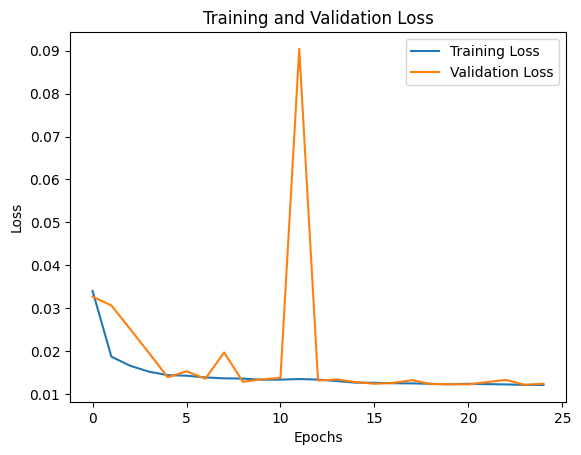

In [64]:

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# Configuración del entrenamiento del autoencoder
callbacks = [
    ModelCheckpoint('autoencoder_references_1.keras', verbose=1, save_weights_only=False),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

history = autoencoder.fit(
    x=x_train,
    y=x_train_b,
    epochs=25,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test_b),
    callbacks=callbacks
)

# Evaluación del modelo en el conjunto de prueba
test_loss = autoencoder.evaluate(x_test, x_test_b)
print("Test loss (MSE):", test_loss)

# Plotting training and validation losses
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


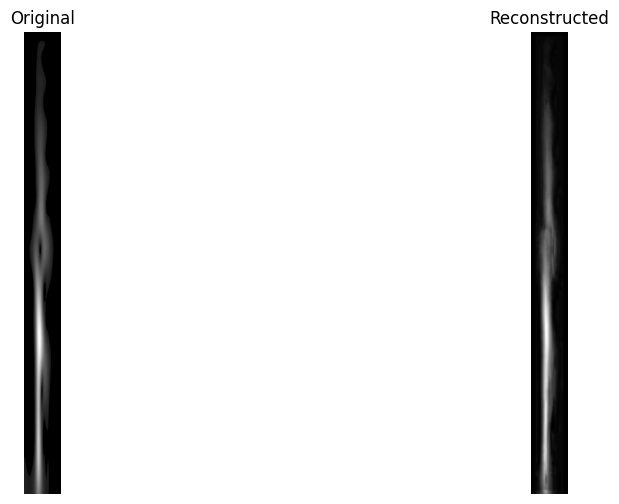

In [65]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Path to the pretrained model (HDF5 file)
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/autoencoder_references_1.keras"

# Path to the input image
image_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/Medidas_en_2D/train/image_1.png"

# Function to load and prepare the image
def prepare_image(img_path):
    # Check if the file exists
    if not os.path.exists(img_path):
        print(f"The file {img_path} does not exist.")
        return None

    # Load image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load image from {img_path}.")
        return None

    # Resize image to match the model's expected input dimensions
    img = cv2.resize(img, (128, 1600))  # Ensure the dimensions are correct
    img = np.array(img).astype('float32') / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=-1)  # Add a channel dimension
    img = np.expand_dims(img, axis=0)  # Add a batch dimension for prediction
    return img

# Prepare the image
input_image = prepare_image(image_path)

# Load the trained autoencoder model
autoencoder = load_model(model_path)

if input_image is not None:
    # Perform prediction
    decoded_image = autoencoder.predict(input_image)

    # Display the original and reconstructed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image[0].reshape(1600, 128), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(decoded_image[0].reshape(1600, 128), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

    plt.show()
else:
    print("The image could not be prepared, and no prediction was performed.")

In [66]:
import keras
from keras.models import load_model

x_out_1601 = x_out_1601.astype('float32') / 255.0
x_out_1601_test = x_out_1601_test.astype('float32') / 255.0

x_train_autec = x_out_1601[:, 1:1601, :, :]
x_test_autec = x_out_1601_test[:, 1:1601, :, :]

# Cargar el modelo
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/autoencoder_references_1.keras"

model = load_model(model_path)

# Predecir usando el modelo cargado
predictions_train = model.predict(x_train_autec)
predictions_test = model.predict(x_test_autec)

# Guardar las predicciones a archivos .npy para fácil carga posterior
np.save('predictions_train_N2C.npy', predictions_train)
np.save('predictions_test_N2C.npy', predictions_test)

print("Predicciones guardadas correctamente.")


150/150 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step
Predicciones guardadas correctamente.


In [67]:
import tensorflow as tf
from functools import partial
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
labels_1601_categorical = label_encoder.fit_transform(labels_1601)
labels_1601_categorical_test = label_encoder.transform(test_labels_1601)

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.0850 - loss: 2.8108 - val_accuracy: 0.3479 - val_loss: 2.5117
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.2235 - loss: 2.4819 - val_accuracy: 0.5492 - val_loss: 1.9166
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 107ms/step - accuracy: 0.3839 - loss: 1.9335 - val_accuracy: 0.7821 - val_loss: 1.2296
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.5277 - loss: 1.4474 - val_accuracy: 0.8192 - val_loss: 0.8891
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.6386 - loss: 1.1019 - val_accuracy: 0.8179 - val_loss: 0.7680
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.7104 - loss: 0.8923 - val_accuracy: 0.8175 - val_loss: 0.7223
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.7454 - loss: 0.7837 - val_accuracy: 0.8454 - val_loss: 0.7085
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.7834 -

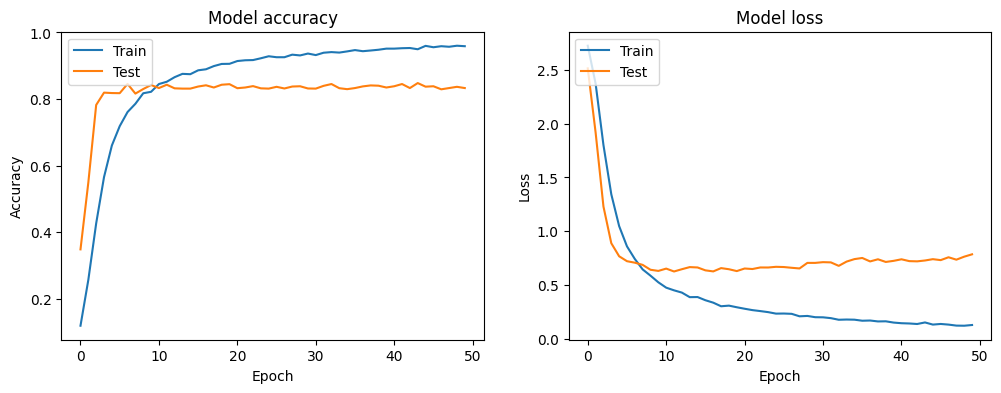

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


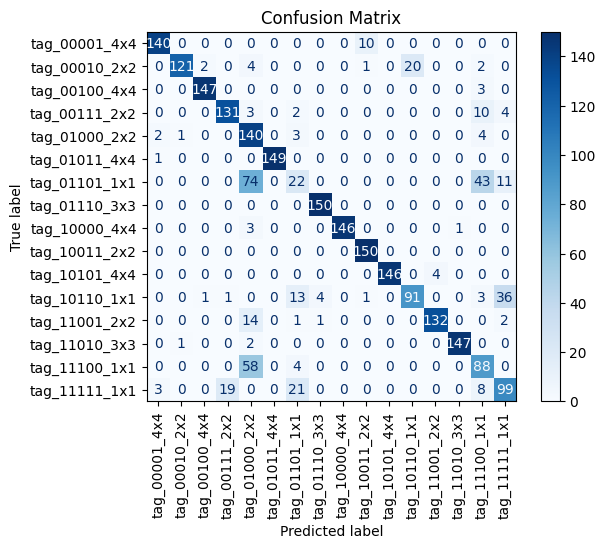

Exactitud del modelo: 83.29%
Tasa de errores: 16.71%


In [68]:
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model_classifier = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model_classifier.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model_classifier.fit(predictions_train, labels_1601_categorical, epochs=100, 
                    validation_data=(predictions_test, labels_1601_categorical_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model_classifier.predict(predictions_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_1601_categorical_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

***Ahora probaremos con un modelo para las referencias***

In [69]:
import tensorflow as tf
from tensorflow.keras.models import load_model

x_out_1601_ref = x_out_1601_ref.astype('float32') / 255.0

x_ref_autec = x_out_1601_ref[:, 1:1601, :, :]

# Cargar el modelo
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/autoencoder_references_1.keras"

try:
    model = load_model(model_path)
except IOError:
    print(f"No se pudo cargar el modelo desde {model_path}. Verifica la ruta.")

# Predecir usando el modelo cargado
predictions_ref = model.predict(x_ref_autec)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


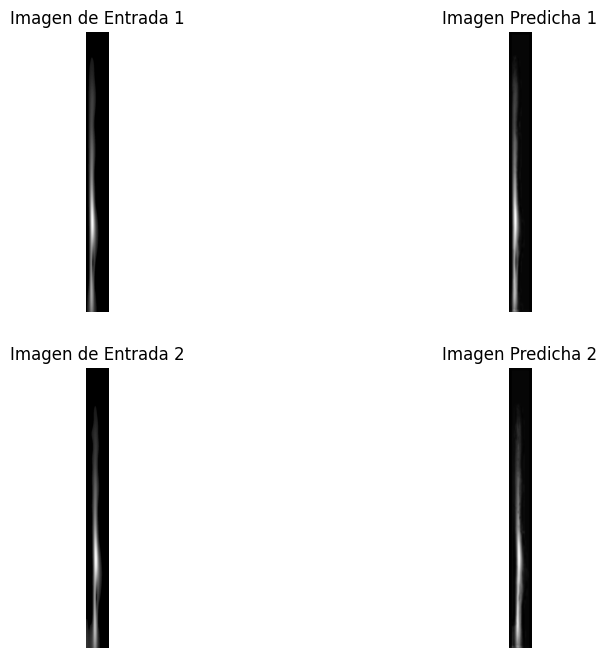

In [70]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))  # Ancho, Alto en pulgadas

# Mostrar la primera imagen de entrada
plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, índice 1
plt.imshow(x_ref_autec[0, :, :, 0], cmap='gray')
plt.title("Imagen de Entrada 1")
plt.axis('off')  # Ocultar los ejes

# Mostrar la primera imagen predicha al lado
plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, índice 2
plt.imshow(predictions_ref[0, :, :, 0], cmap='gray')
plt.title("Imagen Predicha 1")
plt.axis('off')  # Ocultar los ejes

# Mostrar la segunda imagen de entrada en la siguiente fila
plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, índice 3
plt.imshow(x_ref_autec[1, :, :, 0], cmap='gray')
plt.title("Imagen de Entrada 2")
plt.axis('off')  # Ocultar los ejes

# Mostrar la segunda imagen predicha al lado
plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, índice 4
plt.imshow(predictions_ref[1, :, :, 0], cmap='gray')
plt.title("Imagen Predicha 2")
plt.axis('off')  # Ocultar los ejes

plt.show()

In [71]:
# Feed the correctly reshaped data into the model
y_pred = model_classifier.predict(x_ref_autec)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [72]:
# Generate predictions and plot confusion matrix
y_pred = model_classifier.predict(x_ref_autec)
y_pred_classes = np.argmax(y_pred, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [73]:
print(y_pred_classes)

[15  0  0  0  0 15  1  1  1  1 14  2  2  2  2 15  3  3  3  3 14  4  4  4
  8 15  5  5  5  5 15  8 12 12  7 15  7  7  7  7 15  8  8  8  8 15  9  9
  9  9 15 10 10 10 10 15  7  7  7  7 15 12 12 12 12 15 13 13 13 13 15  2
  8  8  2 15 10 15  7 15]


In [74]:
label_encoder.classes_

array(['tag_00001_4x4', 'tag_00010_2x2', 'tag_00100_4x4', 'tag_00111_2x2',
       'tag_01000_2x2', 'tag_01011_4x4', 'tag_01101_1x1', 'tag_01110_3x3',
       'tag_10000_4x4', 'tag_10011_2x2', 'tag_10101_4x4', 'tag_10110_1x1',
       'tag_11001_2x2', 'tag_11010_3x3', 'tag_11100_1x1', 'tag_11111_1x1'],
      dtype='<U13')

In [75]:
# Suponiendo que y_pred_classes contiene índices de las clases predichas
# y que label_encoder es un objeto de LabelEncoder ya ajustado

# Convertir índices de clases a nombres de clases
predicted_class_names = [label_encoder.classes_[i] for i in y_pred_classes]

# Imprimir los nombres de las clases predichas
print(predicted_class_names)

['tag_11111_1x1', 'tag_00001_4x4', 'tag_00001_4x4', 'tag_00001_4x4', 'tag_00001_4x4', 'tag_11111_1x1', 'tag_00010_2x2', 'tag_00010_2x2', 'tag_00010_2x2', 'tag_00010_2x2', 'tag_11100_1x1', 'tag_00100_4x4', 'tag_00100_4x4', 'tag_00100_4x4', 'tag_00100_4x4', 'tag_11111_1x1', 'tag_00111_2x2', 'tag_00111_2x2', 'tag_00111_2x2', 'tag_00111_2x2', 'tag_11100_1x1', 'tag_01000_2x2', 'tag_01000_2x2', 'tag_01000_2x2', 'tag_10000_4x4', 'tag_11111_1x1', 'tag_01011_4x4', 'tag_01011_4x4', 'tag_01011_4x4', 'tag_01011_4x4', 'tag_11111_1x1', 'tag_10000_4x4', 'tag_11001_2x2', 'tag_11001_2x2', 'tag_01110_3x3', 'tag_11111_1x1', 'tag_01110_3x3', 'tag_01110_3x3', 'tag_01110_3x3', 'tag_01110_3x3', 'tag_11111_1x1', 'tag_10000_4x4', 'tag_10000_4x4', 'tag_10000_4x4', 'tag_10000_4x4', 'tag_11111_1x1', 'tag_10011_2x2', 'tag_10011_2x2', 'tag_10011_2x2', 'tag_10011_2x2', 'tag_11111_1x1', 'tag_10101_4x4', 'tag_10101_4x4', 'tag_10101_4x4', 'tag_10101_4x4', 'tag_11111_1x1', 'tag_01110_3x3', 'tag_01110_3x3', 'tag_01110_3x

In [76]:
# Asumiendo que predicted_class_names y labels_1601_ref están en el formato correcto y tienen la misma longitud

# Calcular el número total de predicciones
total_predictions = len(predicted_class_names)

# Calcular el número de predicciones correctas
correct_predictions = sum(p == c for p, c in zip(predicted_class_names, labels_1601_ref))

# Calcular el accuracy
accuracy = correct_predictions / total_predictions

# Imprimir el accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


***Clasificador por intervals al dataset reconstruido con el autoencoder N2C***

In [77]:
positions_050_080 = np.where(intervals == "050_080")[0]
positions_080_110 = np.where(intervals == "080_110")[0]
positions_110_140 = np.where(intervals == "110_140")[0]

In [78]:
# generamos los conjuntos de datos filtrados para cada intervalo 050_080 
aut_filtered_x_out_1601_050_080 = predictions_train[positions_050_080]
aut_filtered_label_050_080 = labels_1601_categorical[positions_050_080]

# generamos los conjuntos de datos filtrados para cada intervalo 080_110
aut_filtered_x_out_1601_080_110 = predictions_train[positions_080_110]
aut_filtered_label_080_110 = labels_1601_categorical[positions_080_110]

# generamos los conjuntos de datos filtrados para cada intervalo 110_140
aut_filtered_x_out_1601_110_140 = predictions_train[positions_110_140]
aut_filtered_label_110_140 = labels_1601_categorical[positions_110_140]

In [79]:
positions_test_050_080 = np.where(test_intervals_1601 == "050_080")[0]
positions_test_080_110 = np.where(test_intervals_1601 == "080_110")[0]
positions_test_110_140 = np.where(test_intervals_1601 == "110_140")[0]

In [80]:
# generamos los conjuntos de datos filtrados para cada intervalo 050_080 
aut_filtered_x_out_1601_050_080_test = predictions_test[positions_test_050_080]
aut_filtered_label_050_080_test = labels_1601_categorical_test[positions_test_050_080]

# generamos los conjuntos de datos filtrados para cada intervalo 080_110
aut_filtered_x_out_1601_080_110_test = predictions_test[positions_test_080_110]
aut_filtered_label_080_110_test = labels_1601_categorical_test[positions_test_080_110]

# generamos los conjuntos de datos filtrados para cada intervalo 110_140
aut_filtered_x_out_1601_110_140_test = predictions_test[positions_test_110_140]
aut_filtered_label_110_140_test = labels_1601_categorical_test[positions_test_110_140]

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.0755 - loss: 2.8677 - val_accuracy: 0.1688 - val_loss: 2.6672
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.0927 - loss: 2.7135 - val_accuracy: 0.3688 - val_loss: 2.5678
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.1787 - loss: 2.5480 - val_accuracy: 0.4975 - val_loss: 2.4038
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.2162 - loss: 2.4138 - val_accuracy: 0.5688 - val_loss: 2.1471
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.3056 - loss: 2.1840 - val_accuracy: 0.6275 - val_loss: 1.8114
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4050 - loss: 1.9211 - val_accuracy: 0.6888 - val_loss: 1.4626
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.4519 - loss: 1.6661 - val_accuracy: 0.7837 - val_loss: 1.1822
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5213 - loss: 1.5032 - val_accu

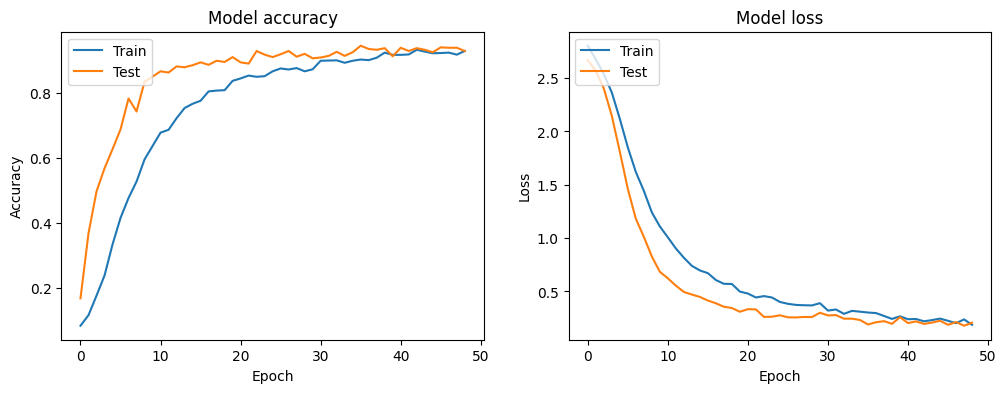

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


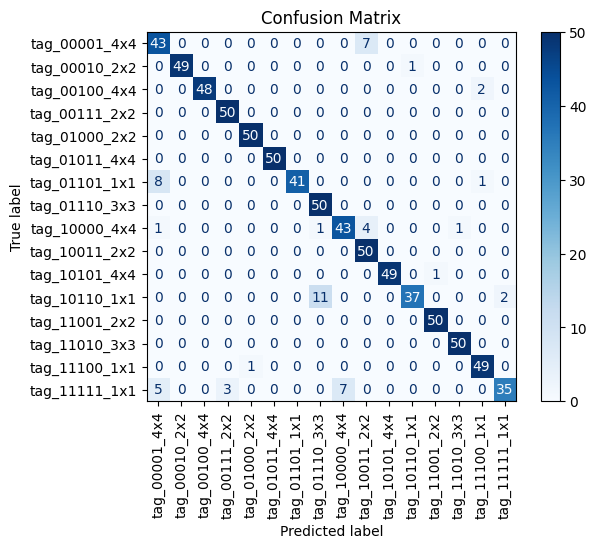

Exactitud del modelo Especifico: 93.00%
Tasa de errores: 7.00%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


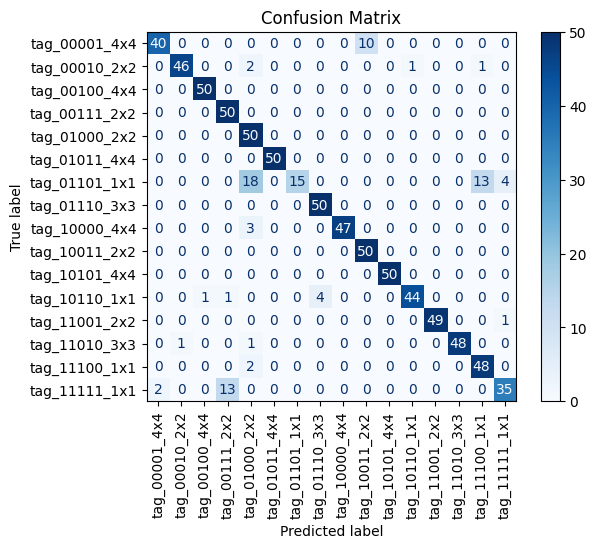

Exactitud del modelo General: 90.25%
Tasa de errores: 9.75%


In [81]:
import tensorflow as tf
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(aut_filtered_x_out_1601_050_080, aut_filtered_label_050_080, epochs=100, 
                    validation_data=(aut_filtered_x_out_1601_050_080_test, aut_filtered_label_050_080_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(aut_filtered_x_out_1601_050_080_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_050_080_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo Especifico: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix

y_pred = model_classifier.predict(aut_filtered_x_out_1601_050_080_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_050_080_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo General: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.0738 - loss: 2.7768 - val_accuracy: 0.0975 - val_loss: 2.7540
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.1098 - loss: 2.7531 - val_accuracy: 0.1187 - val_loss: 2.7304
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.1225 - loss: 2.7276 - val_accuracy: 0.1300 - val_loss: 2.7009
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.1318 - loss: 2.7086 - val_accuracy: 0.1925 - val_loss: 2.6604
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.1573 - loss: 2.6536 - val_accuracy: 0.3438 - val_loss: 2.5969
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.1993 - loss: 2.6129 - val_accuracy: 0.4737 - val_loss: 2.4892
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.2388 - loss: 2.4937 - val_accuracy: 0.6162 - val_loss: 2.3123
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.2825 - loss: 2.3379 - val_accurac

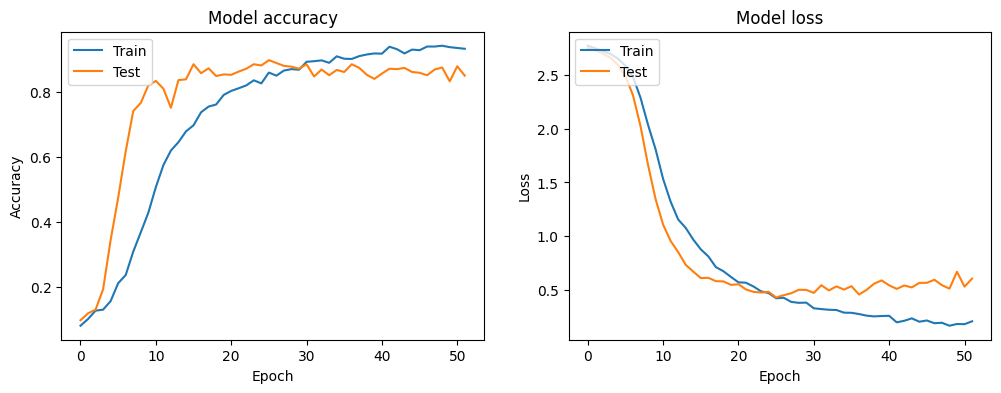

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


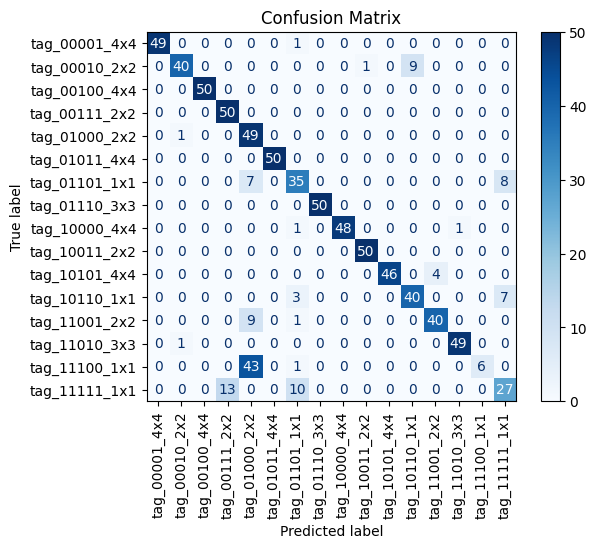

Exactitud del modelo Especifico: 84.88%
Tasa de errores: 15.12%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


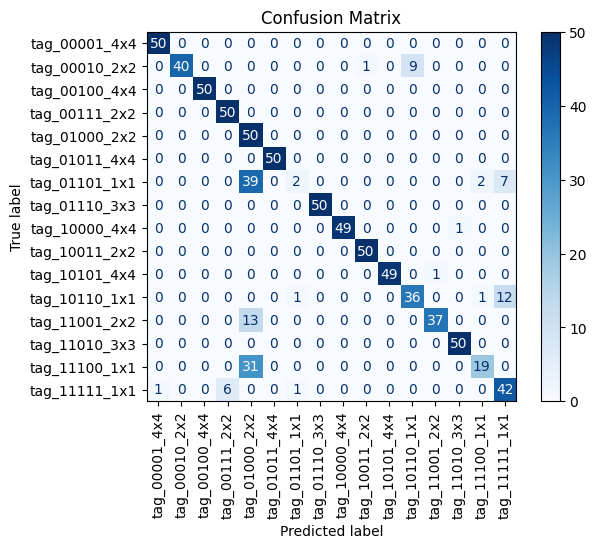

Exactitud del modelo General: 84.25%
Tasa de errores: 15.75%


In [82]:
import tensorflow as tf
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(aut_filtered_x_out_1601_080_110, aut_filtered_label_080_110, epochs=100, 
                    validation_data=(aut_filtered_x_out_1601_080_110_test, aut_filtered_label_080_110_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(aut_filtered_x_out_1601_080_110_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_080_110_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo Especifico: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix

y_pred = model_classifier.predict(aut_filtered_x_out_1601_080_110_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_080_110_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo General: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.0725 - loss: 2.7785 - val_accuracy: 0.0662 - val_loss: 2.7640
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.0833 - loss: 2.7651 - val_accuracy: 0.0887 - val_loss: 2.7543
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.0786 - loss: 2.7562 - val_accuracy: 0.1075 - val_loss: 2.7434
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.1044 - loss: 2.7435 - val_accuracy: 0.1287 - val_loss: 2.7292
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.1259 - loss: 2.7334 - val_accuracy: 0.1400 - val_loss: 2.7111
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.1453 - loss: 2.7135 - val_accuracy: 0.1963 - val_loss: 2.6842
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.1476 - loss: 2.6824 - val_accuracy: 0.2562 - val_loss: 2.6461
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.1546 - loss: 2.6472 - val_accu

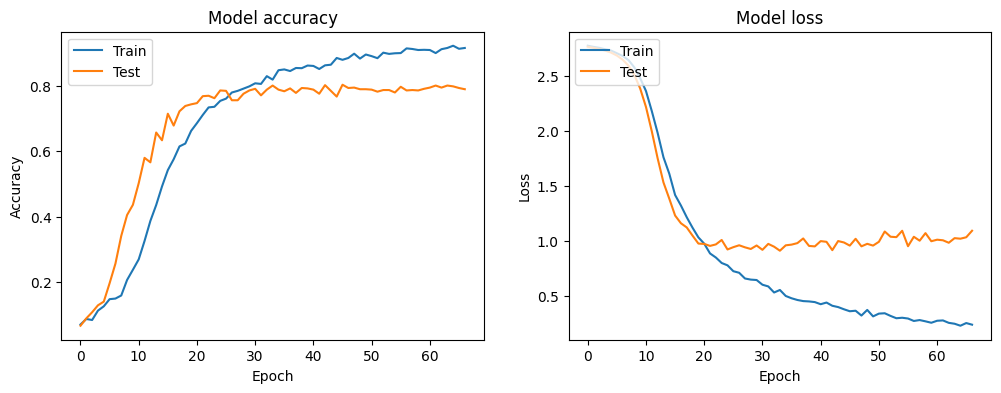

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


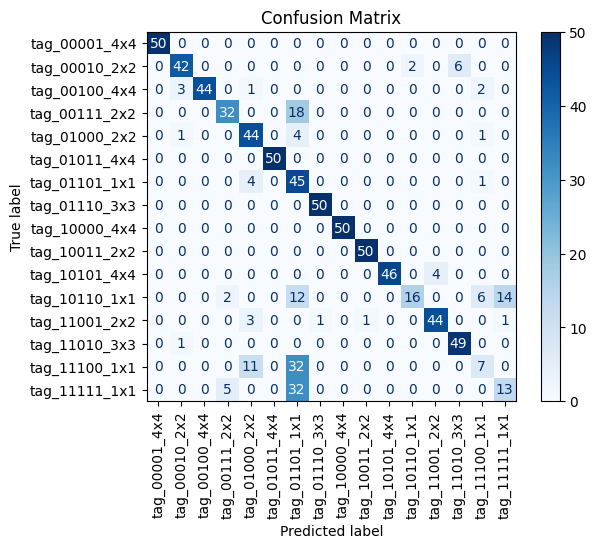

Exactitud del modelo Especifico: 79.00%
Tasa de errores: 21.00%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


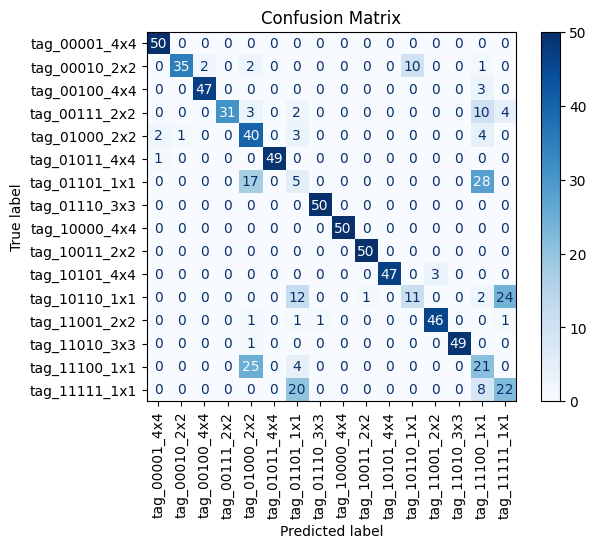

Exactitud del modelo General: 75.38%
Tasa de errores: 24.62%


In [84]:
import tensorflow as tf
from functools import partial

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(aut_filtered_x_out_1601_110_140, aut_filtered_label_110_140, epochs=100, 
                    validation_data=(aut_filtered_x_out_1601_110_140_test, aut_filtered_label_110_140_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(aut_filtered_x_out_1601_110_140_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_110_140_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo Especifico: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix

y_pred = model_classifier.predict(aut_filtered_x_out_1601_110_140_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_110_140_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo General: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")